
## DATA SCIENCE INTERNSHIP LET'S GROW MORE

## ADVANCE  LEVEL TASK

## Task 1:Develop A Neural Network That Can Read Handwriting 

In [4]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


<AxesSubplot:ylabel='count'>

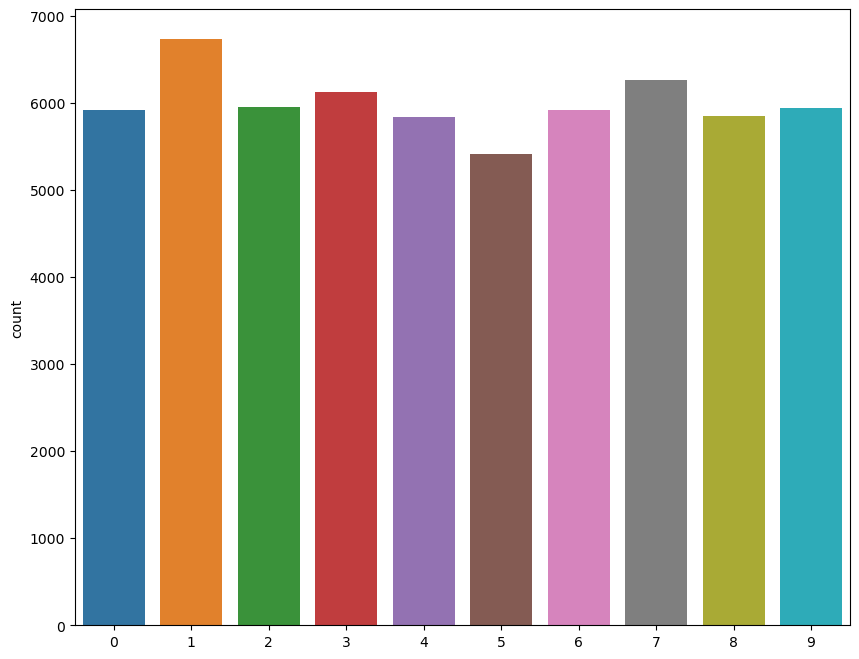

In [5]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

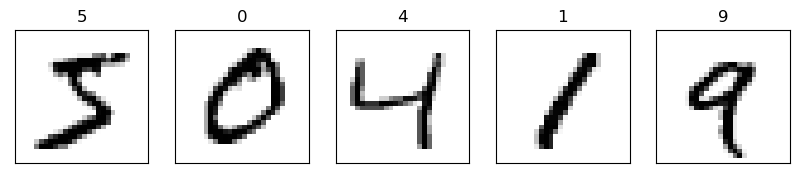

In [14]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 5))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [15]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [17]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Model Building

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [19]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

## Model Training

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)


Epoch 1/10
1688/1688 [==============================] - 393s 231ms/step - loss: 0.2655 - accuracy: 0.9197 - val_loss: 0.0766 - val_accuracy: 0.9823
Epoch 2/10
1688/1688 [==============================] - 381s 225ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.1227 - val_accuracy: 0.9713
Epoch 3/10
1688/1688 [==============================] - 374s 222ms/step - loss: 0.0907 - accuracy: 0.9751 - val_loss: 0.1313 - val_accuracy: 0.9783
Epoch 4/10
1688/1688 [==============================] - 375s 222ms/step - loss: 0.0753 - accuracy: 0.9780 - val_loss: 0.0942 - val_accuracy: 0.9830
Epoch 5/10
1688/1688 [==============================] - 389s 230ms/step - loss: 0.0663 - accuracy: 0.9803 - val_loss: 0.1045 - val_accuracy: 0.9817
Epoch 6/10
1688/1688 [==============================] - 388s 230ms/step - loss: 0.0589 - accuracy: 0.9823 - val_loss: 0.1171 - val_accuracy: 0.9845
Epoch 7/10
1688/1688 [==============================] - 329s 195ms/step - loss: 0.0539 - accuracy: 0.9841 - val_

## Saving the model

In [23]:
model.save('TASK-7.h5')

In [24]:
# Loading The Model
from tensorflow.keras.models import load_model
model = load_model('TASK-7.h5')

 ## Model Evaluation  

In [25]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 13s 41ms/step - loss: 3.0869 - accuracy: 0.9864
Test Loss 3.0869300365448
Test Accuracy 0.9864000082015991


## Plotting Training & Validation plots

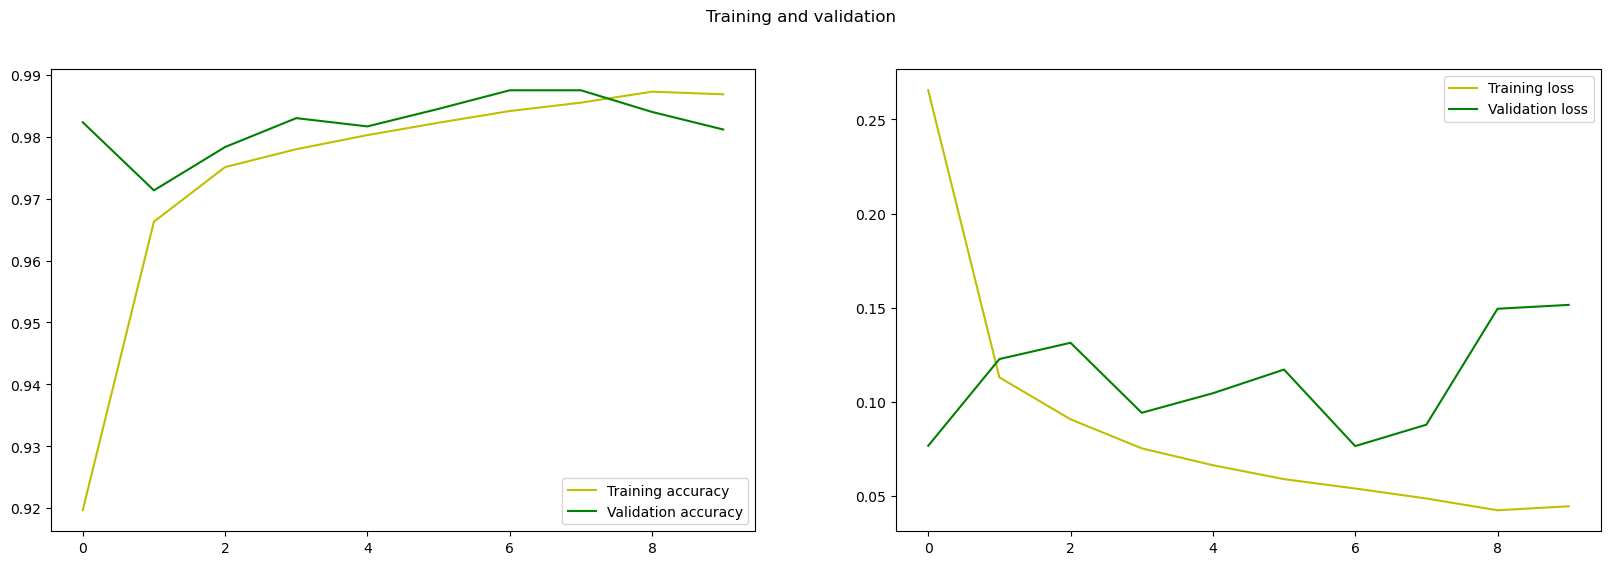

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [27]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 14s 43ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    0,    4,    0,    3,    0,    1,    2],
       [   0, 1120,    0,    0,    3,    1,    8,    3,    0,    0],
       [   1,    1, 1018,    0,    3,    0,    1,    5,    3,    0],
       [   0,    0,    7,  993,    0,    3,    1,    3,    3,    0],
       [   0,    0,    0,    0,  975,    0,    3,    0,    2,    2],
       [   2,    0,    0,    3,    0,  864,   15,    1,    5,    2],
       [   1,    0,    0,    0,    2,    1,  952,    0,    2,    0],
       [   0,    0,    2,    0,    5,    0,    0, 1019,    1,    1],
       [   1,    0,    0,    0,    0,    0,    2,    0,  970,    1],
       [   5,    0,    0,    2,   11,    0,    0,    1,    7,  983]])>

Text(95.72222222222221, 0.5, 'Truth')

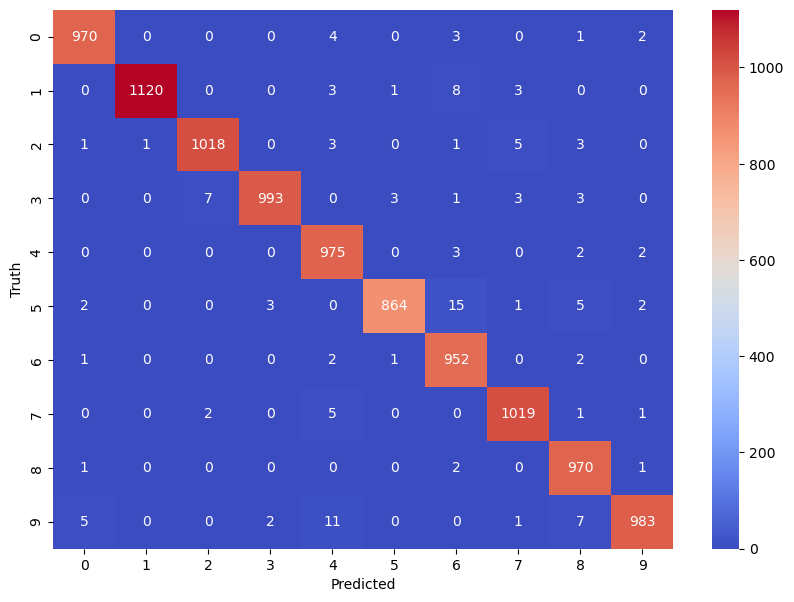

In [28]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Model Testing

313/313 [==============================] - 13s 43ms/step
Predicted Value:  9
Successful prediction


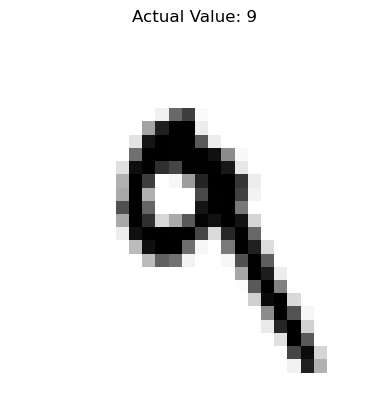

In [29]:
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print

313/313 [==============================] - 12s 40ms/step
Predicted Value:  2
Successful prediction


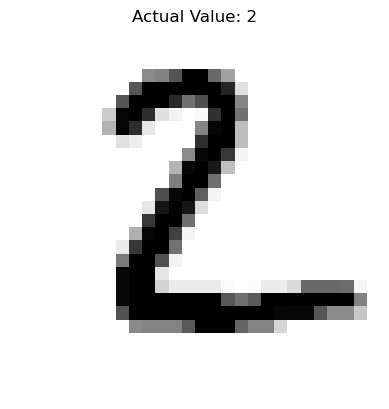

In [30]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')